Nama : Ryan Fadhilah Faizal Hakim

NRP : 2C2220007

### Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


### Load and Understand the Data

In [3]:
# Load the datasets
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

# Display the first few rows of each dataframe to understand their structure
df_train.head()


,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-06-20,237000.0,3,7,False,120.77390,False,False,False,1,False,True,6,2
1,2015-04-20,1328000.0,5,9,True,310.29602,True,True,False,3,False,True,4,4
2,2014-08-13,790500.0,4,9,False,311.22505,False,False,False,2,True,False,8,4
3,2015-04-08,431000.0,4,9,False,282.42512,False,False,False,2,True,False,4,2
4,2015-02-11,199000.0,3,7,True,162.58025,False,False,False,2,True,True,2,2


In [4]:
df_test.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2015-03-19,235000.0,3,7,False,121.70293,False,False,False,1,False,True,3,1
1,2014-09-05,998000.0,4,10,False,350.24431,False,False,False,3,True,False,9,1
2,2014-12-19,430000.0,1,7,False,58.52889,False,False,False,1,False,True,12,4
3,2014-05-14,300000.0,3,6,False,117.05778,False,False,False,1,False,True,5,3
4,2014-08-14,243500.0,3,6,False,196.02533,False,False,False,3,False,True,8,1


### Data Preprocessing




Prapemrosesan data adalah salah satu langkah terpenting dalam Machine Learning. Hal ini meliputi:

*   Mengonversi data non-numerik (misalnya, nilai Benar/Salah) menjadi nilai numerik.
*   Menskalakan fitur numerik sehingga semuanya berada pada skala yang sama, yang meningkatkan kinerja model.


In [5]:
def preprocess_data(df):
    # Convert boolean values (True/False) to integers (0/1)
    df['has_basement'] = df['has_basement'].astype(int)
    df['renovated'] = df['renovated'].astype(int)
    df['nice_view'] = df['nice_view'].astype(int)
    df['perfect_condition'] = df['perfect_condition'].astype(int)
    df['has_lavatory'] = df['has_lavatory'].astype(int)
    df['single_floor'] = df['single_floor'].astype(int)

    # Select the features to use for prediction (independent variables)
    features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2',
                'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
                'has_lavatory', 'single_floor', 'month', 'quartile_zone']

    X = df[features]  # Independent variables
    y = df['price']  # Target variable (price)

    # Normalize the numerical features
    scaler = StandardScaler()
    X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])

    return X, y

# Preprocess the training and test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

<ipython-input-5-a3f31eabcf28>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])
<ipython-input-5-a3f31eabcf28>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])


Warning `SettingWithCopyWarning` terjadi karena kita mencoba mengubah bagian dari DataFrame yang mungkin merupakan "view" (referensi ke data asli) alih-alih "copy" (salinan terpisah). Ini bisa menyebabkan perubahan yang tidak diinginkan.



Pada kasus di atas, peringatan muncul ketika melakukan scaling dengan kode berikut:



`X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])`


Untuk mengatasinya gunakan:
Gunakan `.loc` agar pandas tahu bahwa kita ingin mengubah data secara langsung:

```
X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])

```




In [6]:
def preprocess_data(df):
    # Convert boolean values (True/False) to integers (0/1)
    df['has_basement'] = df['has_basement'].astype(int)
    df['renovated'] = df['renovated'].astype(int)
    df['nice_view'] = df['nice_view'].astype(int)
    df['perfect_condition'] = df['perfect_condition'].astype(int)
    df['has_lavatory'] = df['has_lavatory'].astype(int)
    df['single_floor'] = df['single_floor'].astype(int)

    # Select the features to use for prediction (independent variables)
    features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2',
                'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
                'has_lavatory', 'single_floor', 'month', 'quartile_zone']

    X = df[features]  # Independent variables
    y = df['price']  # Target variable (price)

    # Normalize the numerical features
    scaler = StandardScaler()
    X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])

    return X, y

# Preprocess the training and test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

<ipython-input-6-daea69ba209d>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03185188  1.88542027  0.4267842  ... -1.03185188 -1.03185188
  0.4267842 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])
<ipython-input-6-daea69ba209d>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03852263  1.83109567 -1.03852263 ... -1.03852263  1.83109567
  0.39628652]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])


**Soal 1**

a. Kenapa warning di atas muncul?

b. Buatkan code perbaikan

**Jawaban Soal 1**

a. apabila dipperhatikan, warning di atas muncul karena data ('living_in_m2' dan 'real_bathrooms') yang ingin diubah skala nya (Scaling) bertipe data int64 yang tidak bisa dilakukan operasi sehingga terjadi *incompatible*.

bukti nya adalah sebagai berikut:

In [7]:
df_train.dtypes

,0
date,object
price,float64
bedrooms,int64
grade,int64
has_basement,int64
living_in_m2,float64
renovated,int64
nice_view,int64
perfect_condition,int64
real_bathrooms,int64


dari hasil di atas terbukti bahwa untuk kolom "`real_bathrooms`" bertipe data `int64`

b. Untuk perbaikannya, saya mengubah terlebih dahulu untuk tipe data pada kolom "`real_bathrooms`" menjadi `float` pada datasets `df_train` dan `df_test` nya

In [8]:
df_train['real_bathrooms'] = df_train['real_bathrooms'].astype(float)
df_test['real_bathrooms'] = df_test['real_bathrooms'].astype(float)

selanjutnya saya mencoba kembali untuk menggunakan function `preprocess_data`

In [9]:
# Preprocess the training and test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

Peringatan/warning nya sudah tidak muncul lagi. meski misalnya untuk function `preprocess_data` di cantumkan kembali, itu tidak akan memunculkan warning dikarenakan sudah diubah terlebih dahulu untuk tipe data yang *incompatible*

---

### Building the Model

In [10]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

### Making Predictions

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)


### Evaluating the Model

In [12]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 15125329324.877316


### Visualizing the Results

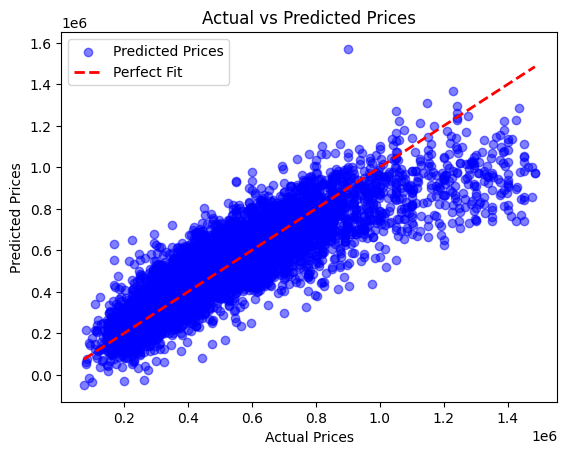

In [13]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Prices')  # Set color and transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')  # Add diagonal line

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


**Interpretasi grafik**



1. Titik Biru (Predicted Prices): Mewakili prediksi model untuk setiap harga properti. Setiap titik menggambarkan seberapa dekat atau jauh prediksi dari harga sebenarnya.
2. Garis Merah (Perfect Fit): Ini adalah garis referensi yang menunjukkan prediksi sempurna. Jika prediksi model akurat, semua titik biru akan terletak di garis merah, yang berarti harga prediksi sama persis dengan harga asli.


**Beberapa Hal yang Terlihat:**
* Banyak titik yang tersebar di sekitar garis merah, yang menunjukkan model memiliki prediksi yang cukup baik. Namun, ada beberapa penyimpangan.
* Kerapatan: Di sekitar garis merah, titik-titik lebih rapat, yang menandakan bahwa sebagian besar prediksi cukup dekat dengan harga sebenarnya.
* Ada outlier atau beberapa titik yang jauh dari garis merah, menunjukkan bahwa model kurang akurat untuk beberapa data.

**Soal 2**

Jika hanya dilihat dari grafik hasilnya memang cukup baik tapi saat melihat nilai MSE hasilnya sangat besar. Kenapa MSE besar tapi plot terlihat baik?

**Jawaban Soal 2**

Sebelum menyimpulkan, ada beberapa hal (hipotesis) yang ingin saya buktikan diantaranya:

* hipotesis 1 karena terdapat Outlier pada data



berikut saya buktikan:

Melakukan visualisasi dengan menggunakan boxplot untuk melihat apakah terdapat outlier atau tidak pada data untuk masing masing fitur nya

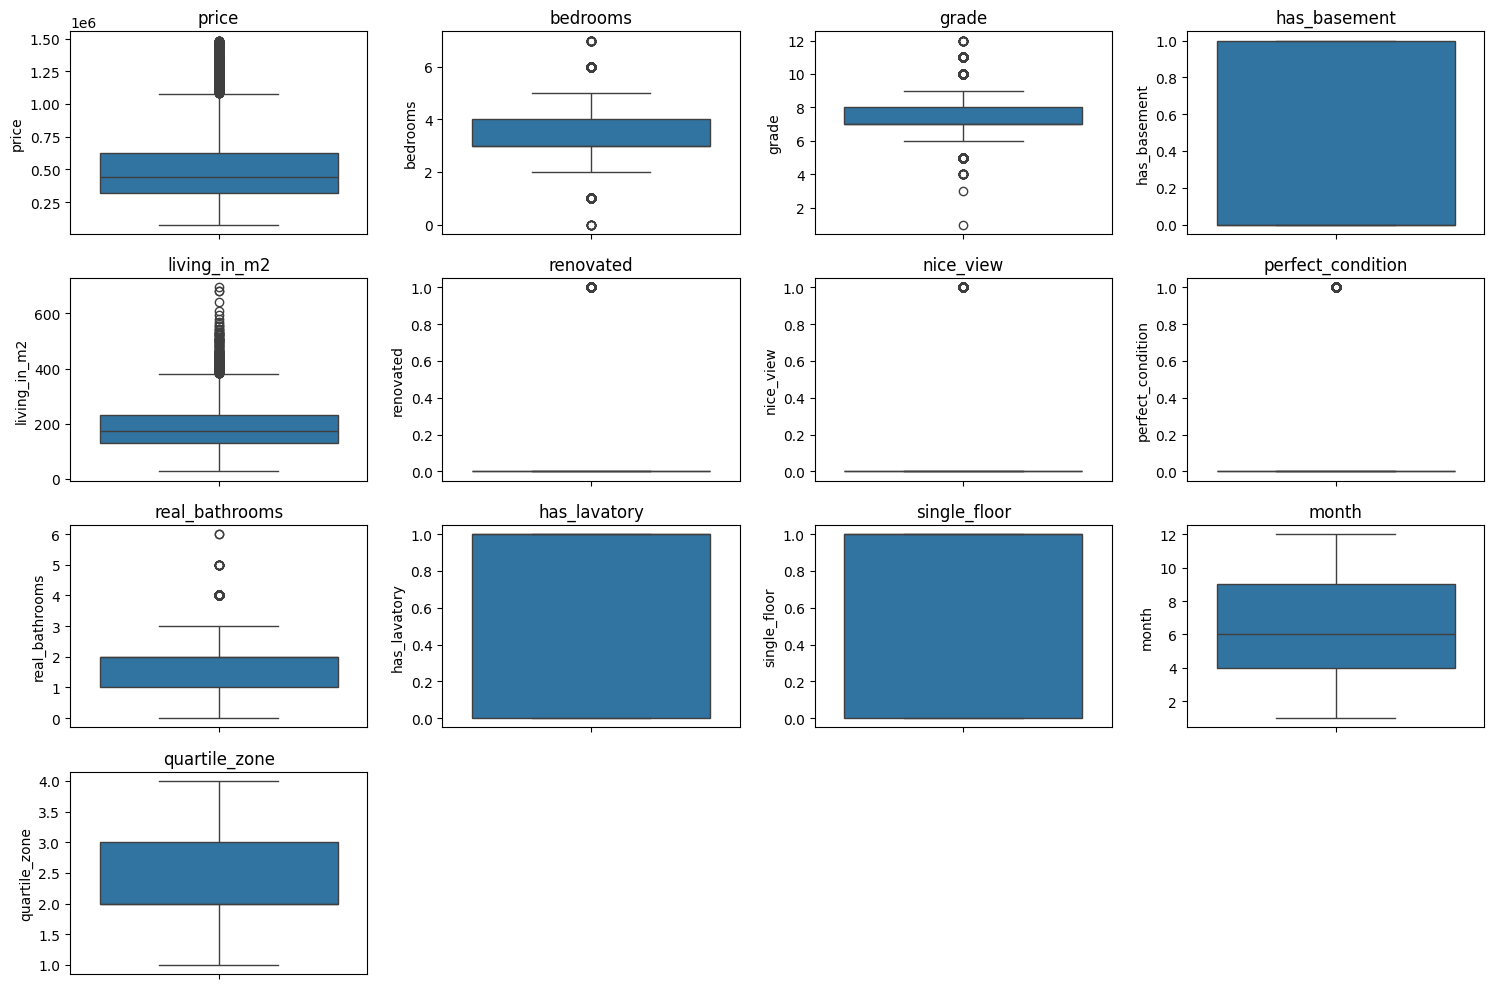

In [14]:
import seaborn as sns

# Daftar fitur yang akan ditampilkan
features = [
    'price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
    'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
    'has_lavatory', 'single_floor', 'month', 'quartile_zone'
]

# Set ukuran plot
plt.figure(figsize=(15, 10))

# Menampilkan box plot untuk setiap fitur
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Mengatur subplot dalam 4 baris dan 4 kolom
    sns.boxplot(y=df_train[feature])
    plt.title(feature)

plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()


Berdasarkan hasil dari visualisasi boxplot di atas menunjukkan bahwa terdapat beberapa fitur yang memiliki nilai outlier seperti `price`, `bedrooms`, `grade`, `living_in_m2`, `renovated`, `nice_view`, `perfect_condition`, dan `real_bathrooms`.

meringkas statistik deskriptif dengan menggunakan method `.describe()` untuk melihat gambaran umum data yang dimiliki.

In [15]:
df_train.describe()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
count,1.410500e+04,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.00000,14105.000000,14105.000000
mean,4.998219e+05,3.339171,7.593407,0.385821,187.540971,0.038568,0.087699,0.075292,1.707409,0.685005,0.50273,6.603828,2.467990
std,2.457127e+05,0.880132,1.092411,0.486806,76.273966,0.192570,0.282867,0.263872,0.685596,0.464530,0.50001,3.116637,1.087813
min,7.800000e+04,0.000000,1.000000,0.000000,26.941870,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,3.190000e+05,3.000000,7.000000,0.000000,130.993230,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,4.000000,2.000000
50%,4.435000e+05,3.000000,7.000000,0.000000,174.657640,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,6.000000,2.000000
75%,6.250000e+05,4.000000,8.000000,1.000000,231.328470,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,9.000000,3.000000
max,1.485000e+06,7.000000,12.000000,1.000000,694.914440,1.000000,1.000000,1.000000,6.000000,1.000000,1.00000,12.000000,4.000000


berdasar data di atas, terdapat beberapa data dengan nilai maximum yang bernilai terbilang jauh dari nilai Quantile nya yang menandakan bahwa itu nilai outlier.

Selanjutnya saya mengganti setiap nilai outlier dalam data dengan nilai Interquantile Range (IQR) dari masing masing fitur dan melihat statistik deskriptif dari data yang sudah diganti nilai outlier nya.

In [16]:
# Daftar fitur yang akan diolah
features = [
    'price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
    'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
    'has_lavatory', 'single_floor', 'month', 'quartile_zone'
]

def replace_outliers_iqr(df, column):
    # Hitung Q1 dan Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Hitung IQR
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Ganti outlier untuk semua fitur
for feature in features:
    replace_outliers_iqr(df_train, feature)

for feature in features:
    replace_outliers_iqr(df_test, feature)

# Tampilkan hasil setelah penggantian outlier
df_train.describe()


,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
count,1.410500e+04,14105.000000,14105.000000,14105.000000,14105.000000,14105.0,14105.0,14105.0,14105.000000,14105.000000,14105.00000,14105.000000,14105.000000
mean,4.941378e+05,3.336086,7.557816,0.385821,186.608503,0.0,0.0,0.0,1.701205,0.685005,0.50273,6.603828,2.467990
std,2.287420e+05,0.841023,0.970700,0.486806,73.141647,0.0,0.0,0.0,0.665338,0.464530,0.50001,3.116637,1.087813
min,7.800000e+04,1.500000,5.500000,0.000000,26.941870,0.0,0.0,0.0,0.000000,0.000000,0.00000,1.000000,1.000000
25%,3.190000e+05,3.000000,7.000000,0.000000,130.993230,0.0,0.0,0.0,1.000000,0.000000,0.00000,4.000000,2.000000
50%,4.435000e+05,3.000000,7.000000,0.000000,174.657640,0.0,0.0,0.0,2.000000,1.000000,1.00000,6.000000,2.000000
75%,6.250000e+05,4.000000,8.000000,1.000000,231.328470,0.0,0.0,0.0,2.000000,1.000000,1.00000,9.000000,3.000000
max,1.084000e+06,5.500000,9.500000,1.000000,381.831330,0.0,0.0,0.0,3.500000,1.000000,1.00000,12.000000,4.000000


Langkah selanjutnya adalah saya melakukan pelatihan ulang dari data yang sudah diganti nilai outlier nya dengan model linear regression.

In [17]:
# Preprocess the training and test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

In [18]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [20]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13557555648.409164


Pada hasil di atas terlihat bahwa nilai MSE nya berkurang. kita komparasi berikut:

**Sebelum :**

```
Mean Squared Error: 15125329324.877316
```

**Sesudah :**

```
Mean Squared Error: 13557555648.409164
```

Maka terbukti bahwa Outlier pada datasets dapat secara signifikan meningkatkan MSE

* kedua adalah **distribusi data**

Jika data tidak terdistribusi secara normal atau memiliki pola yang kompleks, model regresi linier mungkin tidak dapat menangkap hubungan yang sebenarnya. Salah satu teknik nya yaitu dengan menggunakan `StandardScaler()` untuk membuat data menjadi rentang distribusi yang konsisten.

**Soal 3**


Untuk memperbaiki model di atas lakukan:
1. Pemilihan Fitur: Gunakan teknik pemilihan fitur untuk mengidentifikasi fitur yang paling relevan dan mengurangi kompleksitas model.

2. Regularisasi: Pertimbangkan untuk menambahkan regularisasi (seperti Lasso atau Ridge) untuk mengurangi risiko overfitting.

**Jawaban Soal 3**

1. Pemilihan Fitur

Pada proses pemilihan fitur ini yaitu dengan mengakses koefisien fitur.

In [25]:
koefisien_fitur = pd.DataFrame({'fitur': X_train.columns, 'koefisien': model.coef_})
koefisien_fitur.sort_values(by='koefisien', ascending=False)

,fitur,koefisien
11,quartile_zone,1.037661e+05
3,living_in_m2,9.473669e+04
1,grade,5.737860e+04
2,has_basement,3.304229e+04
4,renovated,1.455192e-11
5,nice_view,7.275958e-12
6,perfect_condition,7.275958e-12
10,month,-2.215442e+03
0,bedrooms,-7.097443e+03
7,real_bathrooms,-8.807674e+03


berdasarkan hasil di atas bahwa untuk nilai koefisien tertinggi ada pada fitur `quartile_zone`, `living_in_m2`, `grade`, dan `has_basement` sehingga akan dipilih sebagai fitur untuk memprediksi target.

In [28]:
X_train_selected = X_train[['quartile_zone', 'living_in_m2', 'grade', 'has_basement']]

X_test_selected = X_test[['quartile_zone', 'living_in_m2', 'grade', 'has_basement']]


Melakukan pelatihan model linear regression

In [30]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train_selected, y_train)


LinearRegression()

In [31]:
# Make predictions on the test data
y_pred = model.predict(X_test_selected)


In [32]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13901373652.132534


Berdasarkan hasil di atas, meski hanya dengan 4 fitur saja sudah mendapatkan nilai MSE yang kecil dibandingkan dengan model sebelumnya. Dengan komparasi:

**Model dengan tanpa processing pada data :**

```
Mean Squared Error: 15125329324.877316
```

**Model dengan mengganti outlier pada data :**

```
Mean Squared Error: 13557555648.409164
```

**Model dengan feature selection (4 fitur) pada data yang sudah diganti nilai outlier nya:**

```
Mean Squared Error: 13901373652.132534
```



2. Regularisasi

Disini saya menggabungkan antara regularisasi dari Lasso Regression dan Ridge Regression dengan menggunakan `ElasticNet()`

In [44]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.5, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [45]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 14505839934.031553


Berdasarkan hasil dari evaluasi untuk model `ElasticNet` dengan parameter `alpha = 0.5` dan `l1_ratio = 0.5` di dapatkan nilai dari `MSE = 14505839934.031553`

Selanjutnya saya buat model `ElasticNet` tetapi dengan hyperparameter tuning untuk mendapatkan hasil yang lebih optimal.

disini yang saya gunakan adalah function `GridSearchCV()` untuk mencari parameter yang optimal untuk model yang dibuat. nilai parameter `alpha` yang dicari berada di rentang 0.0001 hingga 10, dan nilai parameter `l1_ratio` yang dicari berada di rentang 0 hingga 1.

In [47]:
import numpy as np
from sklearn.model_selection import GridSearchCV

model = ElasticNet()

param_grid = {
    'alpha': np.logspace(-4, 1, 10), # Rentang nilai alpha dari 0.0001 hingga 10
    'l1_ratio': np.linspace(0, 1, 10) # Rentang nilai l1_ratio dari 0 hingga 1
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.700e+13, tolerance: 5.957e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.701e+13, tolerance: 5.916e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Best Model: ElasticNet(alpha=0.001291549665014884, l1_ratio=0.5555555555555556)
Best Parameters: {'alpha': 0.001291549665014884, 'l1_ratio': 0.5555555555555556}


Hasil dari gridsearch nya bahwa parameter `alpha` yang optimal adalah *0.001291549665014884* dan `l1_ratio` dengan nilai *0.5555555555555556*

selanjutnya menggunakan nilai parameter optimal pada model `ElasticNet`

In [52]:
model = ElasticNet(alpha=0.001291549665014884, l1_ratio=0.5555555555555556)
model.fit(X_train, y_train)

ElasticNet(alpha=0.001291549665014884, l1_ratio=0.5555555555555556)

In [53]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13557898675.61716


**Soal 4**

Jelaskan hasilnya setelah model diperbaiki

**Jawaban Soal 4**

berikut saya rangkum untuk hasil dari setiap model yang say buat

**Model dengan tanpa processing pada data :**

```
Mean Squared Error: 15125329324.877316
```

**Model dengan mengganti outlier pada data :**

```
Mean Squared Error: 13557555648.409164
```

**Model dengan feature selection (4 fitur) pada data yang sudah diganti nilai outlier nya :**

```
Mean Squared Error: 13901373652.132534
```

**Model ElasticNet dengan parameter alpha = 0.5 dan l1_ratio = 0.5 :**

```
Mean Squared Error: 14505839934.031553
```

**Model ElasticNet dengan hyperparameter tuning :**

```
Mean Squared Error: 13557898675.61716
```

Jika di urutkan dari MSE dengan nilai terkecil sampai terbesar, maka urutannya adalah sebagai berikut:

**Model dengan mengganti outlier pada data:**

```
MSE: 13557555648.409164
```

**Model ElasticNet dengan hyperparameter tuning:**

```
MSE: 13557898675.61716
```

**Model dengan feature selection (4 fitur) pada data yang sudah diganti nilai outliernya:**

```
MSE: 13901373652.132534
```

**Model ElasticNet dengan parameter alpha = 0.5 dan l1_ratio = 0.5:**

```
MSE: 14505839934.031553
```

**Model tanpa processing pada data:**

```
MSE: 15125329324.877316
```

Berdasarkan hal tersebut, maka model Linear Regression terbaik adalah **Model dengan mengganti nilai outlier pada data**.